Model tests

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
all_data = pd.read_csv("./OFZ Data - Dataset.csv")
display(all_data)

,Index,Название,Начало Торгов,Погашение,Купон,Периодичность,ISIN,start,end,Price,days_to_maturity,moex_ytm,years_to_maturity,Date,Rate,Inflation,Observed Inflation,Expected inflation 1y
0,5,26208,07.03.2012,27.02.2019,7.5,2,SU26208RMFS7,2012-03-07,2019-02-27,101.11525,422,6.6351,1.156164,2018-01-01,7.75,2.50,10.0,8.7
1,12,26216,13.11.2013,15.05.2019,6.7,2,SU26216RMFS0,2013-11-13,2019-05-15,100.04750,499,6.8103,1.367123,2018-01-01,7.75,2.50,10.0,8.7
2,7,26210,19.12.2012,11.12.2019,6.8,2,SU26210RMFS3,2012-12-19,2019-12-11,100.11450,709,6.8798,1.942466,2018-01-01,7.75,2.50,10.0,8.7
3,10,26214,23.10.2013,27.05.2020,6.4,2,SU26214RMFS5,2013-10-23,2020-05-27,99.06450,877,6.9665,2.402740,2018-01-01,7.75,2.50,10.0,8.7
4,3,26205,13.02.2012,14.04.2021,7.6,2,SU26205RMFS3,2012-02-13,2021-04-14,102.45550,1199,6.8859,3.284932,2018-01-01,7.75,2.50,10.0,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,17,26233,13.05.2020,18.07.2035,6.1,2,SU26233RMFS5,2020-05-13,2035-07-18,65.74400,4247,11.8467,11.635616,2023-12-01,15.00,7.48,15.1,12.2
1539,24,26240,30.06.2021,30.07.2036,7.0,2,SU26240RMFS0,2021-06-30,2036-07-30,70.24550,4625,11.8485,12.671233,2023-12-01,15.00,7.48,15.1,12.2
1540,27,26243,21.06.2023,19.05.2038,9.8,2,SU26243RMFS4,2023-06-21,2038-05-19,87.85850,5283,11.8803,14.473973,2023-12-01,15.00,7.48,15.1,12.2
1541,14,26230,19.06.2019,16.03.2039,7.7,2,SU26230RMFS1,2019-06-19,2039-03-16,72.62575,5584,11.8831,15.298630,2023-12-01,15.00,7.48,15.1,12.2


In [4]:
data = all_data[["years_to_maturity", "Rate", "Inflation", "Observed Inflation", "Expected inflation 1y", "Купон", "Price", "moex_ytm"]]
data = data.apply(pd.to_numeric)
data = data[data["years_to_maturity"] > 1]
display(data)

,years_to_maturity,Rate,Inflation,Observed Inflation,Expected inflation 1y,Купон,Price,moex_ytm
0,1.156164,7.75,2.50,10.0,8.7,7.5,101.11525,6.6351
1,1.367123,7.75,2.50,10.0,8.7,6.7,100.04750,6.8103
2,1.942466,7.75,2.50,10.0,8.7,6.8,100.11450,6.8798
3,2.402740,7.75,2.50,10.0,8.7,6.4,99.06450,6.9665
4,3.284932,7.75,2.50,10.0,8.7,7.6,102.45550,6.8859
...,...,...,...,...,...,...,...,...
1538,11.635616,15.00,7.48,15.1,12.2,6.1,65.74400,11.8467
1539,12.671233,15.00,7.48,15.1,12.2,7.0,70.24550,11.8485
1540,14.473973,15.00,7.48,15.1,12.2,9.8,87.85850,11.8803
1541,15.298630,15.00,7.48,15.1,12.2,7.7,72.62575,11.8831


In [5]:
data[["Price", "moex_ytm"]].corr()

,Price,moex_ytm
Price,1.000000,-0.823007
moex_ytm,-0.823007,1.000000


In [6]:
normal = data[data['Rate'] > 7]


In [647]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_vars = [ 'Inflation', 'Rate', 'Observed Inflation', 'Expected inflation 1y', "ln_t"]
normal["ln_t"] = np.log(normal["years_to_maturity"])
normal = normal.drop("years_to_maturity", axis=1)

normal[num_vars] = scaler.fit_transform(normal[num_vars])

C:\Users\igor\AppData\Local\Temp\ipykernel_19620\1487395293.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal["ln_t"] = np.log(normal["years_to_maturity"])


In [648]:
normal.describe()

,Rate,Inflation,Observed Inflation,Expected inflation 1y,Купон,Price,moex_ytm,ln_t
count,2.040000e+02,2.040000e+02,2.040000e+02,2.040000e+02,204.000000,204.000000,204.000000,2.040000e+02
mean,1.393221e-16,-5.572884e-16,6.966105e-16,-1.393221e-16,7.165931,85.346968,11.003195,3.483053e-17
std,1.002460e+00,1.002460e+00,1.002460e+00,1.002460e+00,1.060964,8.827183,1.320372,1.002460e+00
min,-1.404613e+00,-1.222387e+00,-9.635806e-01,-6.759545e-01,4.500000,63.212750,8.489000,-2.735917e+00
25%,-6.545055e-01,-9.335380e-01,-8.716070e-01,-5.390637e-01,6.700000,79.310625,10.016925,-5.718007e-01
50%,9.560192e-02,7.939312e-01,-3.197658e-01,-2.196517e-01,7.100000,86.861125,11.361450,1.314972e-01
75%,4.289830e-01,1.019009e+00,7.264331e-01,-8.276081e-02,7.700000,92.154813,12.097625,6.897070e-01
max,2.095888e+00,1.155931e+00,1.703652e+00,2.563796e+00,11.250000,99.902500,14.260200,1.518449e+00


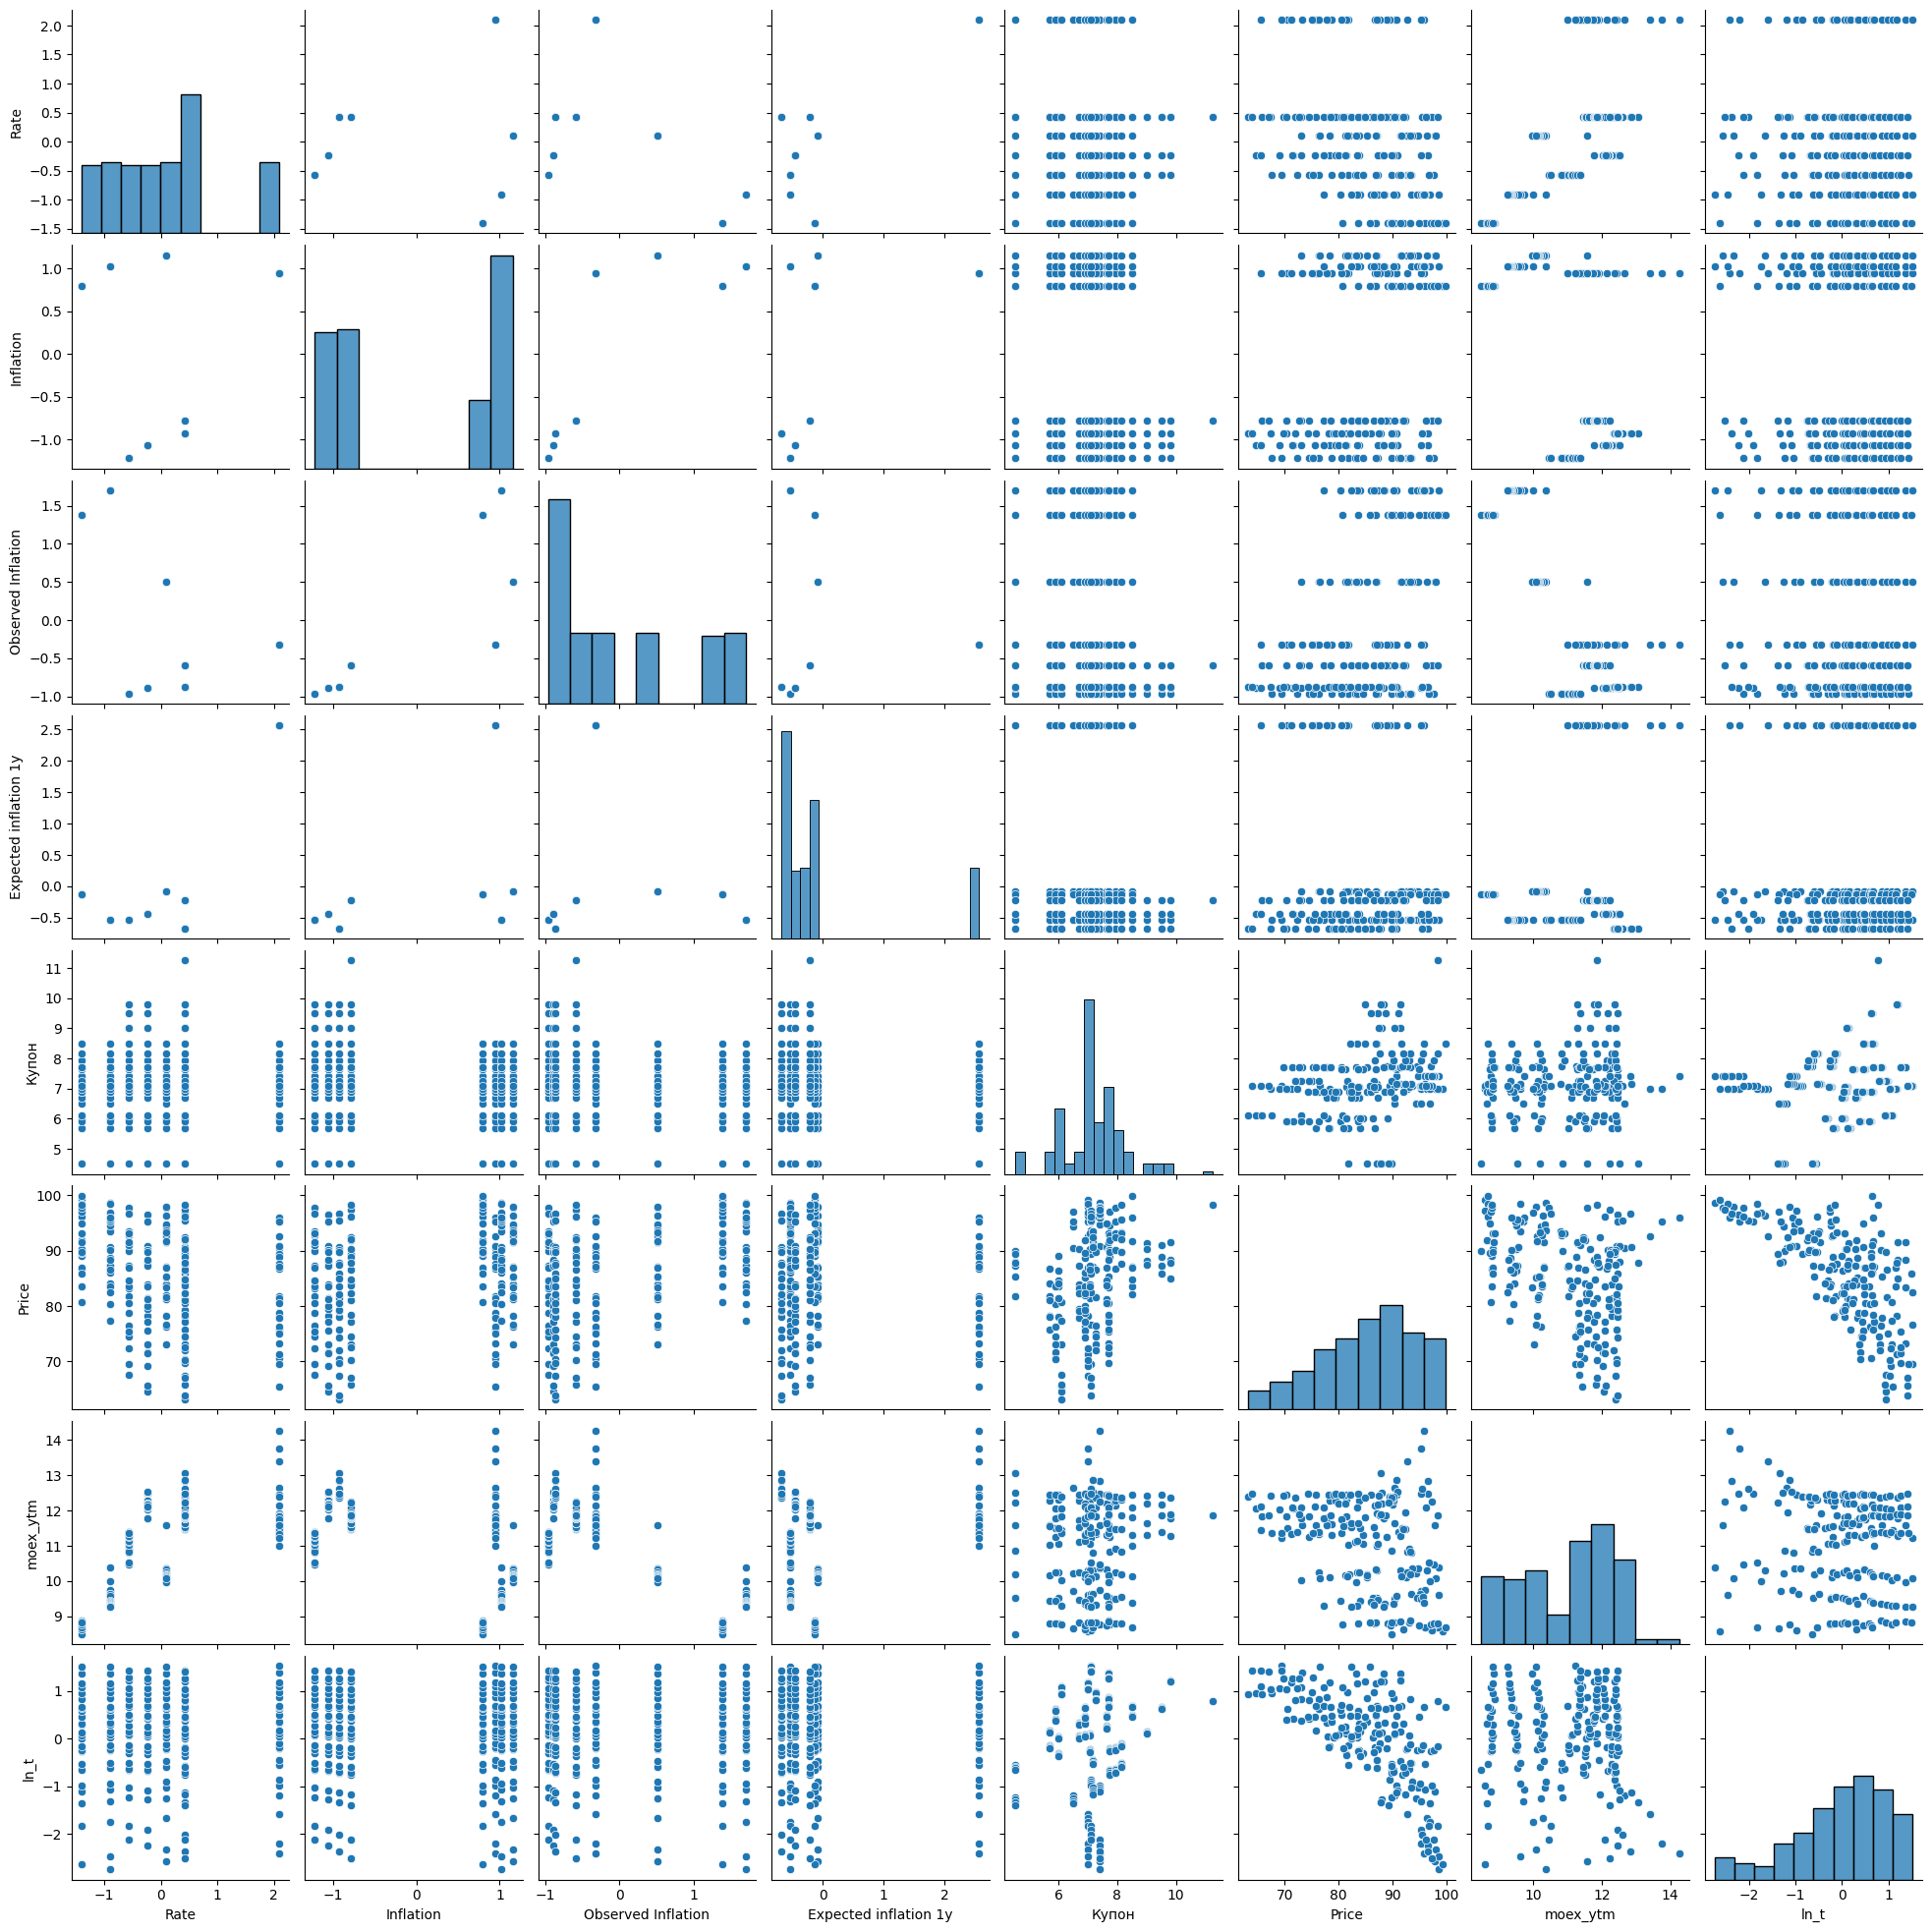

In [649]:
sns.pairplot(normal)

In [650]:
np.random.seed(0)
df_train, df_test = train_test_split(normal, train_size = 0.7, test_size = 0.3, random_state = 10)

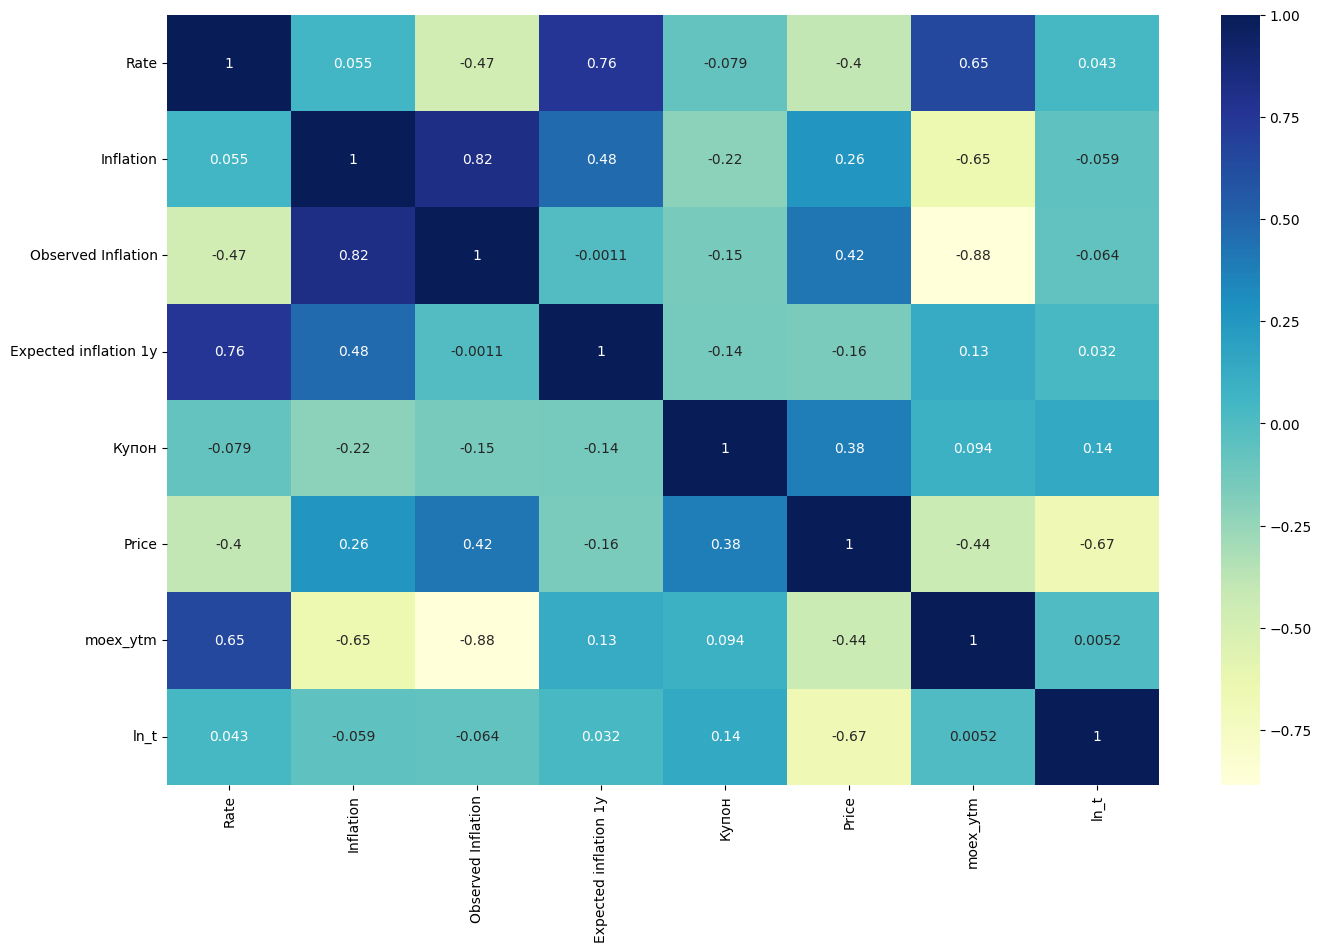

In [651]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()


In [652]:
y_train = df_train.pop('moex_ytm')
X_train = df_train

In [653]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

In [654]:
lm = ElasticNet(alpha=0.5)
lm.fit(X_train, y_train)

ElasticNet(alpha=0.5)

In [655]:
rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [656]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Rate', True, 1),
 ('Inflation', True, 1),
 ('Observed Inflation', True, 1),
 ('Expected inflation 1y', False, 5),
 ('Купон', False, 4),
 ('Price', False, 2),
 ('ln_t', False, 3)]

In [657]:
col = X_train.columns[rfe.support_]
col

Index(['Rate', 'Inflation', 'Observed Inflation'], dtype='object')

In [658]:
X_train.columns[~rfe.support_]

Index(['Expected inflation 1y', 'Купон', 'Price', 'ln_t'], dtype='object')

In [659]:
X_train_rfe = X_train[col]

In [660]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [661]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [662]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               moex_ytm   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     353.5
Date:                Sun, 07 Jan 2024   Prob (F-statistic):           1.49e-64
Time:                        23:00:23   Log-Likelihood:                -82.950
No. Observations:                 142   AIC:                             173.9
Df Residuals:                     138   BIC:                             185.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 10.9525      0

In [663]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [664]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Observed Inflation,15.65
2,Inflation,12.19
1,Rate,5.23
0,const,1.01


In [665]:
y_train_price = lm.predict(X_train_rfe)

In [666]:
res = (y_train_price - y_train)

Text(0.5, 9.444444444444438, 'Errors')

<Figure size 640x480 with 0 Axes>

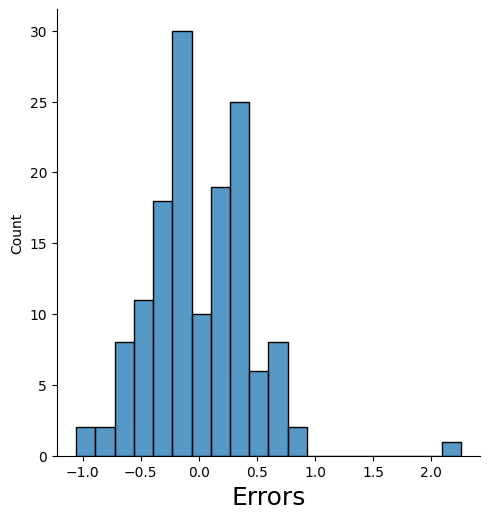

In [667]:
%matplotlib inline
fig = plt.figure()
sns.displot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)              
plt.xlabel('Errors', fontsize = 18)   

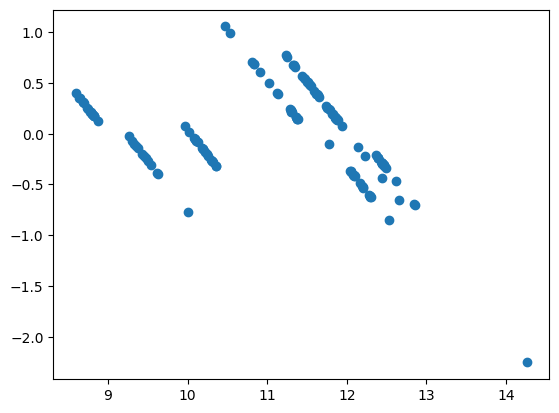

In [668]:
plt.scatter(y_train,res)
plt.show()

In [669]:
df_test.describe()

,Rate,Inflation,Observed Inflation,Expected inflation 1y,Купон,Price,moex_ytm,ln_t
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,-0.025383,0.148467,0.169400,0.027635,6.979032,86.176524,10.964908,-0.145086
std,1.061636,0.998494,1.079378,1.071959,1.115742,8.220237,1.411463,1.169411
min,-1.404613,-1.222387,-0.963581,-0.675955,4.500000,65.598500,8.489000,-2.735917
25%,-0.904541,-0.933538,-0.871607,-0.539064,6.750000,80.783000,9.579500,-0.731879
50%,-0.237779,0.793931,-0.319766,-0.447803,7.100000,87.369375,11.299950,0.027948
75%,0.428983,1.019009,1.381745,-0.094168,7.700000,91.800875,12.229475,0.809903
max,2.095888,1.155931,1.703652,2.563796,9.800000,99.226000,13.760800,1.427620


In [670]:
y_test = df_test["moex_ytm"]
X_test = df_test
X_test = sm.add_constant(X_test)
X_test_rfe = X_test[X_train_rfe.columns]

In [671]:
y_pred = lm.predict(X_test_rfe)

In [672]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.851196120008369

array([[<Axes: title={'center': 'Rate'}>,
        <Axes: title={'center': 'Inflation'}>],
       [<Axes: title={'center': 'ln_t'}>, <Axes: >]], dtype=object)

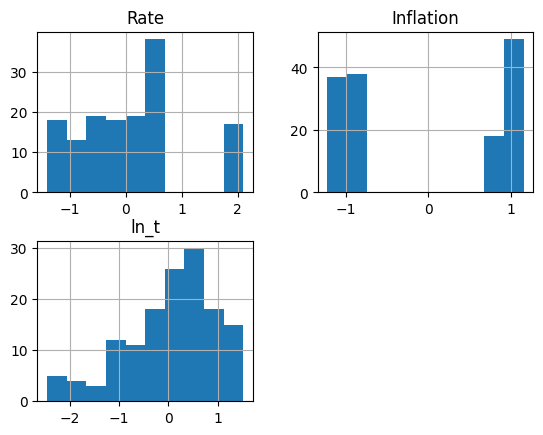

In [673]:
X_train[["Rate","Inflation", "ln_t"]].hist()

In [674]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.036280448232512794

Text(0, 0.5, 'y_pred')

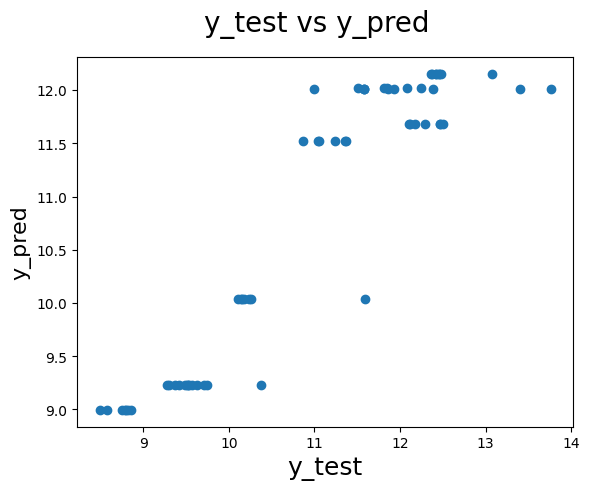

In [675]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 